In [1]:
# %matplotlib_svg
%pylab inline
# import numpy as np
# from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## 繪圖函數簡介

### 對數座標圖

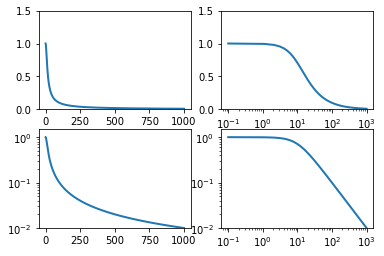

In [2]:
#%fig=低通濾波器的頻率響應：算術座標（左上）、X軸對數座標（右上）、Y軸對數座標（左下）、雙對數座標（右上） 
w = np.linspace(0.1, 1000, 1000)
p = np.abs(1/(1+0.1j*w)) # 計算低通濾波器的頻率響應

fig, axes = plt.subplots(2, 2)

functions = ("plot", "semilogx", "semilogy", "loglog")

for ax, fname in zip(axes.ravel(), functions):
    func = getattr(ax, fname)
    func(w, p, linewidth=2)
    ax.set_ylim(0, 1.5)

### 極座標圖

(<a list of 4 Line2D thetagridline objects>,
 <a list of 2 Text thetagridlabel objects>)

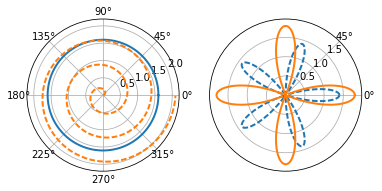

In [3]:
#%fig=極座標中的圓、螺旋線和玫瑰線
theta = np.arange(0, 2*np.pi, 0.02)

plt.subplot(121, polar=True) #❶
plt.plot(theta, 1.6*np.ones_like(theta), linewidth=2) #❷
plt.plot(3*theta, theta/3, "--", linewidth=2)

plt.subplot(122, polar=True)
plt.plot(theta, 1.4*np.cos(5*theta), "--", linewidth=2)
plt.plot(theta, 1.8*np.cos(4*theta), linewidth=2)
plt.rgrids(np.arange(0.5, 2, 0.5), angle=45) #❸
plt.thetagrids([0, 45]) #❹;

### 柱狀圖

/home/wei/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


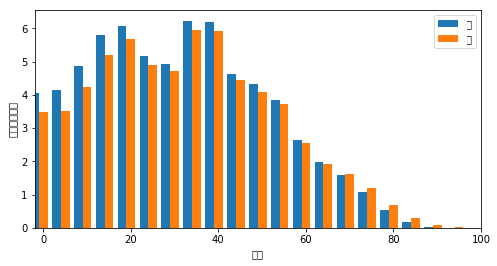

In [4]:
#%fig=中國男女人口的年齡分佈圖
data = np.loadtxt("china_population.txt")
width = (data[1,0] - data[0,0])*0.4 #❶
plt.figure(figsize=(8, 4))
c1, c2 = plt.rcParams['axes.color_cycle'][:2]
plt.bar(data[:,0]-width, data[:,1]/1e7, width, color=c1, label=u"男") #❷
plt.bar(data[:,0], data[:,2]/1e7, width, color=c2, label=u"女") #❸
plt.xlim(-width, 100)
plt.xlabel(u"年齡")
plt.ylabel(u"人口（千萬）")
plt.legend();

### 雜湊圖

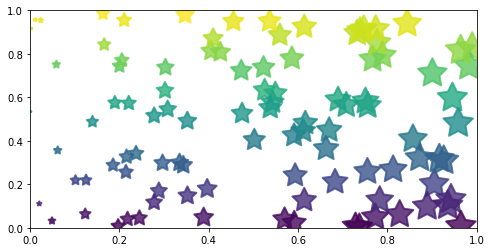

In [5]:
#%fig=可指定點的彩色和大小的雜湊
plt.figure(figsize=(8, 4))
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x, y, s=x*1000, c=y, marker=(5, 1), 
            alpha=0.8, lw=2, facecolors="none")
plt.xlim(0, 1)
plt.ylim(0, 1);

### 圖形

In [8]:
img = plt.imread("lena.jpg")
print(img.shape, img.dtype)

(393, 512, 3) uint8


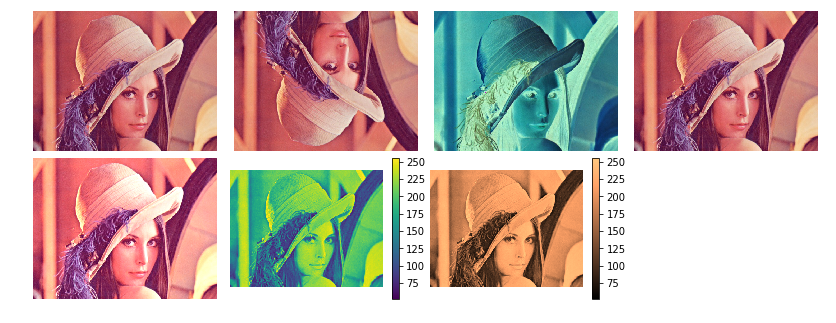

In [26]:
#%fig=用imread()和imshow()顯示圖形
img = plt.imread("lena.jpg")
fig, axes = plt.subplots(2, 4, figsize=(11, 4))
fig.subplots_adjust(0, 0, 1, 1, 0.05, 0.05)

axes = axes.ravel()

axes[0].imshow(img)                        #❶
axes[1].imshow(img, origin="lower")        #❷
axes[2].imshow(img * 1.0)                  #❸
axes[3].imshow(img / 255.0)                #❹
axes[4].imshow(np.clip(img / 200.0, 0, 1)) #❺

axe_img = axes[5].imshow(img[:, :, 0])     #❻
plt.colorbar(axe_img, ax=axes[5])

axe_img = axes[6].imshow(img[:, :, 0], cmap="copper") #❼
plt.colorbar(axe_img, ax=axes[6])

for ax in axes:
    ax.set_axis_off()

In [59]:
import matplotlib.cm as cm
sorted(cm.cmap_d.keys())[:5] 

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG']

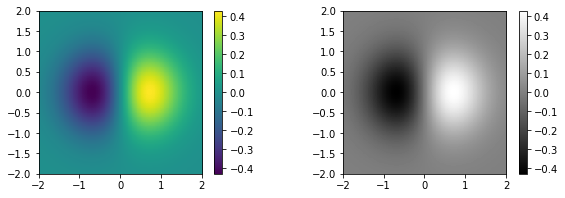

In [60]:
#%fig=使用imshow()可視化二元函數
y, x = np.ogrid[-2:2:200j, -2:2:200j]
z = x * np.exp( - x**2 - y**2) #❶

extent = [np.min(x), np.max(x), np.min(y), np.max(y)] #❷

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(z, extent=extent, origin="lower") #❷
plt.colorbar()
plt.subplot(122)
plt.imshow(z, extent=extent, cmap=cm.gray, origin="lower")
plt.colorbar();

### 相等線圖

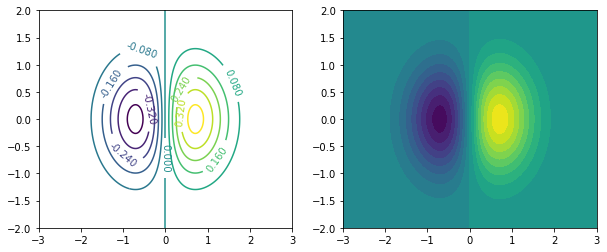

In [61]:
#%fig=用contour(左)和contourf(右)描繪相等線圖
y, x = np.ogrid[-2:2:200j, -3:3:300j] #❶
z = x * np.exp( - x**2 - y**2) 

extent = [np.min(x), np.max(x), np.min(y), np.max(y)]

plt.figure(figsize=(10,4))
plt.subplot(121)
cs = plt.contour(z, 10, extent=extent) #❷
plt.clabel(cs) #❸
plt.subplot(122)
plt.contourf(x.reshape(-1), y.reshape(-1), z, 20) #❹;

In [62]:
z.shape, x.shape

((200, 300), (1, 300))

> **TIP**

> 若果需要對雜湊點資料繪制相等線圖，可以先使用`scipy.interpolate`模組中提供的插值函數將雜湊點資料插值為網格資料。

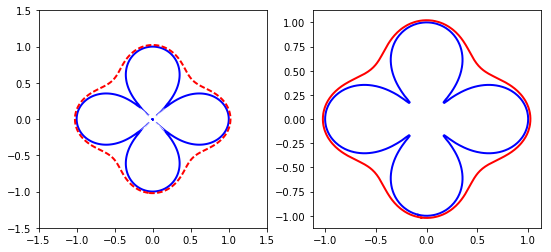

In [63]:
#%fig=使用相等線繪制隱函數曲線（左），取得相等線資料並繪圖（右）
y, x = np.ogrid[-1.5:1.5:200j, -1.5:1.5:200j]
f = (x**2 + y**2)**4 - (x**2 - y**2)**2

plt.figure(figsize=(9, 4))
plt.subplot(121)
extent = [np.min(x), np.max(x), np.min(y), np.max(y)]
cs = plt.contour(f, extent=extent, levels=[0, 0.1],    #❶
     colors=["b", "r"], linestyles=["solid", "dashed"], linewidths=[2, 2])

plt.subplot(122)
for c in cs.collections: #❷
    data = c.get_paths()[0].vertices
    plt.plot(data[:,0], data[:,1], 
        color=c.get_color()[0],  linewidth=c.get_linewidth()[0])

In [64]:
print(cs)
cs.collections

<a list of 2 mcoll.LineCollection objects>

In [65]:
print(cs.collections[0].get_color()[0])
print(cs.collections[0].get_linewidth()[0])

[ 0.  0.  1.  1.]
2


In [66]:
len(cs.collections[0].get_paths())

42

In [67]:
path = cs.collections[0].get_paths()[0]
path.vertices

array([[-0.08291457, -0.98938936],
       [-0.09039269, -0.98743719],
       [-0.09798995, -0.98513674],
       ..., 
       [-0.05276382, -0.99548781],
       [-0.0678392 , -0.99273907],
       [-0.08291457, -0.98938936]])

### 四邊形網格

In [68]:
X = np.array([[0, 1, 2], 
              [0, 1, 2]])
Y = np.array([[0, 0.2, 0],
              [1, 0.8, 1]])
Z = np.array([[0.5, 0.8]])

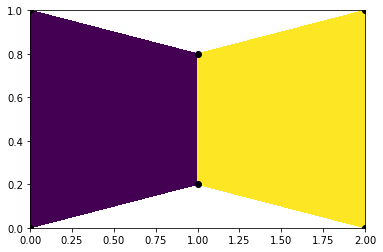

In [69]:
#%fig=示範pcolormesh()繪制的四邊形以及其填充彩色
plt.plot(X.ravel(), Y.ravel(), "ko")
plt.pcolormesh(X, Y, Z)
plt.margins(0.1);

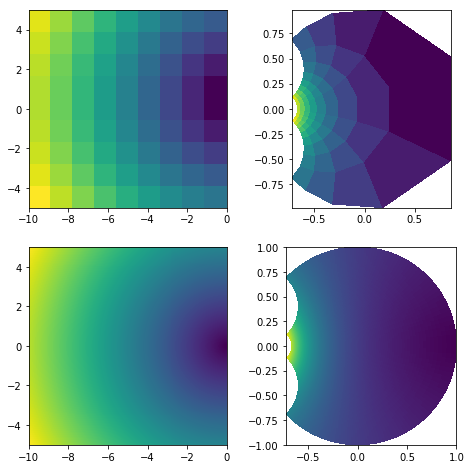

In [70]:
#%fig=使用pcolormesh()繪制復數平面上的座標變換
def make_mesh(n):
    x, y = np.mgrid[-10:0:n*1j, -5:5:n*1j]

    s = x + 1j*y
    z = (2 + s) / (2 - s)
    return s, z

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()
for ax in axes:
    ax.set_aspect("equal")
    
s1, z1 = make_mesh(10)
s2, z2 = make_mesh(200)
axes[0].pcolormesh(s1.real, s1.imag, np.abs(s1))
axes[1].pcolormesh(z1.real, z1.imag, np.abs(s1))
axes[2].pcolormesh(s2.real, s2.imag, np.abs(s2), rasterized=True)
axes[3].pcolormesh(z2.real, z2.imag, np.abs(s2), rasterized=True);

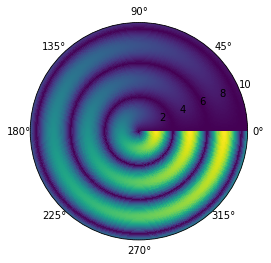

In [81]:
#%fig=使用pcolormesh()繪制極座標中的網格
def func(theta, r):
    y = theta * np.sin(r)
    return np.sqrt(y*y)

T, R = np.mgrid[0:2*np.pi:360j, 0:10:100j]
Z = func(T, R)

ax=plt.subplot(111, projection="polar", aspect=1.)
ax.pcolormesh(T, R, Z, rasterized=True);

### 三角網格

In [82]:
with open("diffusion.txt") as f:
    data = {"points":[], "triangles":[], "values":[]}
    values = None
    for line in f:
        line = line.strip()
        if not line:
            continue
        if line.startswith("#"):
            values = data[line[1:]]
            continue
        values.append([float(s) for s in line.split()])
        
data = {key:np.array(data[key]) for key in data}

In [84]:
#%hide
# %matplotlib_png

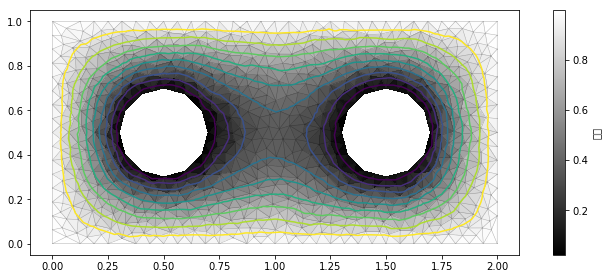

In [85]:
#%fig=使用tripcolor()和tricontour()繪制三角網格和相等線
X, Y = data["points"].T
triangles = data["triangles"].astype(int)
values = data["values"].squeeze()

fig, ax = plt.subplots(figsize=(12, 4.5))
ax.set_aspect("equal")

mapper = ax.tripcolor(X, Y, triangles, values, cmap="gray") #❶
plt.colorbar(mapper, label=u"溫度")

plt.triplot(X, Y, triangles, lw=0.5, alpha=0.3, color="k") #❷

Xc = X[triangles].mean(axis=1)
Yc = Y[triangles].mean(axis=1)
plt.tricontour(Xc, Yc, values, 10) #❸;

In [45]:
#%hide
%matplotlib_svg

ERROR:root:Line magic function `%matplotlib_svg` not found.


### 箭頭圖

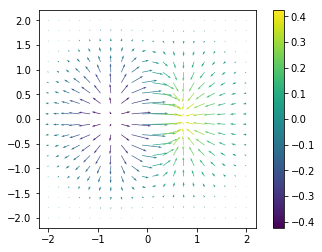

In [75]:
#%fig=用quiver()繪制向量場
def f(x, y):
    return x * np.exp(- x**2 - y**2)

def vec_field(f, x, y, dx=1e-6, dy=1e-6):
    x2 = x + dx
    y2 = y + dy
    v = f(x, y)
    vx = (f(x2, y) - v) / dx
    vy = (f(x, y2) - v) / dy 
    return vx, vy
    
X, Y = np.mgrid[-2:2:20j, -2:2:20j]
C = f(X, Y)
U, V = vec_field(f, X, Y)
plt.quiver(X, Y, U, V, C)
plt.colorbar();
plt.gca().set_aspect("equal")

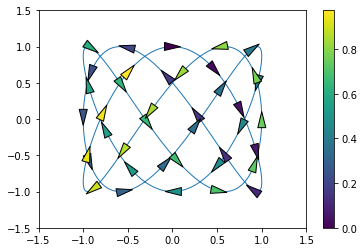

In [76]:
#%fig=使用箭頭表示參數曲線的切線方向
n = 40
arrow_size = 16
t = np.linspace(0, 1, 1000)
x = np.sin(3*2*np.pi*t)
y = np.cos(5*2*np.pi*t)
line, = plt.plot(x, y, lw=1)

lengths = np.cumsum(np.hypot(np.diff(x), np.diff(y)))
length = lengths[-1]
arrow_locations = np.linspace(0, length, n, endpoint=False)
index = np.searchsorted(lengths, arrow_locations)
dx = x[index + 1] - x[index]
dy = y[index + 1] - y[index]
ds = np.hypot(dx, dy)
dx /= ds
dy /= ds
plt.quiver(x[index], y[index], dx, dy, t[index],
          units="dots", scale_units="dots", 
          angles="xy", scale=1.0/arrow_size, pivot="middle",
          edgecolors="black", linewidths=1,
          width=1, headwidth=arrow_size*0.5, 
          headlength=arrow_size, headaxislength=arrow_size, 
          zorder=100)
plt.colorbar()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5]);

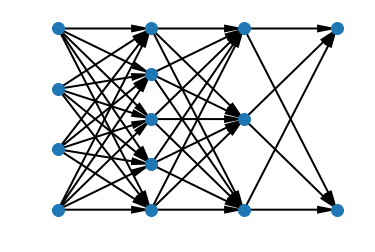

In [77]:
#%fig=使用quiver()繪制神經網路結構示意圖
levels = [4, 5, 3, 2]
x = np.linspace(0, 1, len(levels))

for i in range(len(levels) - 1):
    j = i + 1
    n1, n2 = levels[i], levels[j]
    y1, y2 = np.mgrid[0:1:n1*1j, 0:1:n2*1j]
    x1 = np.full_like(y1, x[i])
    x2 = np.full_like(y2, x[j])
    plt.quiver(x1, y1, x2-x1, y2-y1, 
              angles="xy", units="dots", scale_units="xy", 
              scale=1, width=2, headlength=10,
              headaxislength=10, headwidth=4)
    
yp = np.concatenate([np.linspace(0, 1, n) for n in levels])
xp = np.repeat(x, levels)
plt.plot(xp, yp, "o", ms=12)
plt.gca().axis("off")
plt.margins(0.1, 0.1);

### 3D繪圖

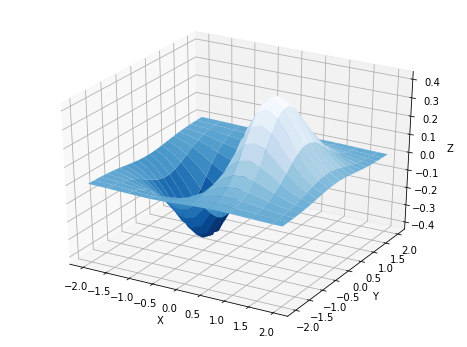

In [78]:
#%fig=使用mplot3D繪制的3D曲面圖
import mpl_toolkits.mplot3d #❶

x, y = np.mgrid[-2:2:20j, -2:2:20j] #❷
z = x * np.exp( - x**2 - y**2)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d') #❸
ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap = plt.cm.Blues_r) #❹
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z");